# Clasificación

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [25]:
df=pd.read_csv("train_titanic.csv")

In [26]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket','Embarked'], inplace=True)

In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [28]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
# se puede hacer asi pero vimos que hay mejores formas

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


AttributeError: 'numpy.int64' object has no attribute 'startswith'

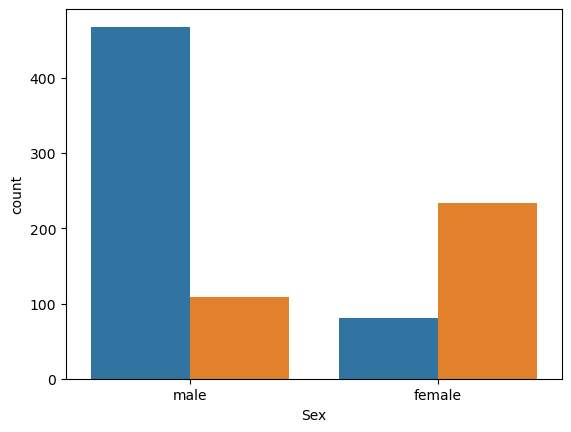

In [33]:
df['Sex'] = df['Sex'].astype(str)
sns.countplot(x="Sex", hue = "Survived", data = df)

In [34]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [35]:
df=pd.get_dummies(df, drop_first=True, dtype="int")
# aqui no lo hace por que pclass es int o float

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [37]:
df['Pclass'] = df['Pclass'].astype(str)
df2=pd.get_dummies(df, drop_first=True)
# ahora si lo hace por que los transforma a str

In [38]:
df2=df2.astype("float")

In [39]:
df2

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
0,0.0,22.000000,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,0.0,0.0,0.0
4,0.0,35.000000,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,27.000000,0.0,0.0,13.0000,1.0,1.0,0.0
887,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,0.0
888,0.0,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [40]:
clf = LogisticRegression()
# clf = classifier
# regresion lineal la solucion era directa, no había que iterar
# en la logistica hay que hacer GD

In [41]:
X = df2.drop('Survived', axis=1)
Y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [42]:
# parametros del modelo
# ya tengo el preprocesamiento hecho
clf = LogisticRegression(solver='liblinear')
# solver es el tipo de gadiente GD
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [43]:
clf.coef_

array([[-0.02031629, -0.27214137, -0.1399579 ,  0.00742138, -2.38412239,
        -0.04215101, -1.15942536]])

In [44]:
# Predecimos 
# la Y predecidaviene de las probabilidades y escogiendo directamente el threshold como 0.5
Y_pred = clf.predict(X_test)

In [45]:
Y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [46]:
# en lugar de querer la variable target como 0,1 lo queremos como probabilidades
# utilizamos la función predict_proba les objeto que hemos ajustado
probs = clf.predict_proba(X_test)
# predict
# predict_proba

In [48]:
probs
# la columna izq da la pro de ser 0, a de la der de ser 1
# queremos la 1, por que es la que comparamos con el treshold
# se podri jugar con la columna izq y los falsos

array([0.08842633, 0.29623769, 0.14452755, 0.88632842, 0.61782096,
       0.8975071 , 0.60050983, 0.10280576, 0.66505537, 0.83780803,
       0.28884177, 0.09407647, 0.39716065, 0.12062323, 0.27922552,
       0.87438061, 0.26763636, 0.60065082, 0.31746203, 0.30149246,
       0.13474203, 0.31756966, 0.58748742, 0.14572449, 0.12714534,
       0.07425328, 0.29355672, 0.3001203 , 0.08307963, 0.59433949,
       0.14703045, 0.63737925, 0.34370701, 0.6001537 , 0.14974232,
       0.1048854 , 0.35970513, 0.60050983, 0.84985311, 0.12180465,
       0.32325531, 0.09624193, 0.12192712, 0.12168896, 0.50163229,
       0.10041353, 0.14727493, 0.13829966, 0.1340119 , 0.29134698,
       0.57701976, 0.79219836, 0.05374607, 0.4610247 , 0.06334521,
       0.88679154, 0.29201974, 0.94235335, 0.81987535, 0.65156264,
       0.14189815, 0.85952756, 0.80575864, 0.33576519, 0.12168896,
       0.72921044, 0.45151066, 0.12331546, 0.10578874, 0.79659279,
       0.78973975, 0.94635185, 0.35966252, 0.82136015, 0.13709

In [51]:
(probs[:,1]>0.5)
# cogenos la segudna col y ponemos el treshold que queremos usar

array([False, False, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False,

In [52]:
(probs[:,1]>0.5).astype("int")
# para verlo mejor con 1 y 0

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0])

In [53]:
# accuracy, no es aconsejable medir el error con score
clf.score(X_test,y_test)
# ya no es el mse, ahora es el accuracy

0.8101694915254237

In [54]:
# accuracy_score calcula la accuracy entre dos vector uno de Y reales y uno de Y predecidas

#Y_pred=clf.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8101694915254237

In [55]:
Y_pred_train=clf.predict(X_train)
accuracy_score(y_train,Y_pred_train)

0.8003355704697986

[[156  19]
 [ 37  83]]


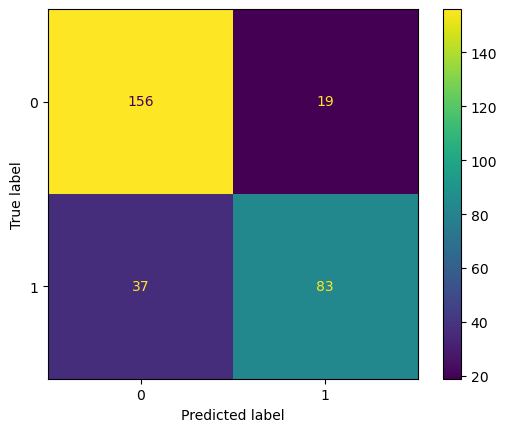

In [57]:
cfm = confusion_matrix(y_test, Y_pred) # ()
print(cfm)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()


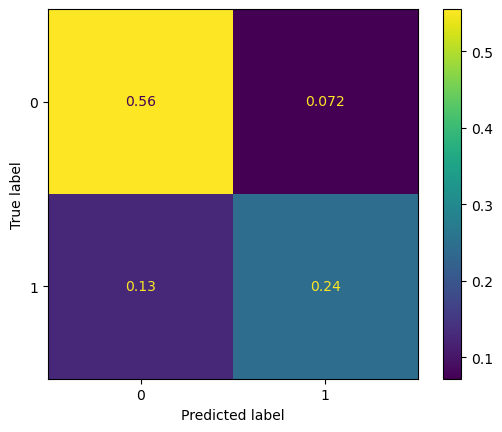

In [60]:
cfm = confusion_matrix(y_train, Y_pred_train, normalize="all") # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

In [59]:
probs[:,1]

array([0.08842633, 0.29623769, 0.14452755, 0.88632842, 0.61782096,
       0.8975071 , 0.60050983, 0.10280576, 0.66505537, 0.83780803,
       0.28884177, 0.09407647, 0.39716065, 0.12062323, 0.27922552,
       0.87438061, 0.26763636, 0.60065082, 0.31746203, 0.30149246,
       0.13474203, 0.31756966, 0.58748742, 0.14572449, 0.12714534,
       0.07425328, 0.29355672, 0.3001203 , 0.08307963, 0.59433949,
       0.14703045, 0.63737925, 0.34370701, 0.6001537 , 0.14974232,
       0.1048854 , 0.35970513, 0.60050983, 0.84985311, 0.12180465,
       0.32325531, 0.09624193, 0.12192712, 0.12168896, 0.50163229,
       0.10041353, 0.14727493, 0.13829966, 0.1340119 , 0.29134698,
       0.57701976, 0.79219836, 0.05374607, 0.4610247 , 0.06334521,
       0.88679154, 0.29201974, 0.94235335, 0.81987535, 0.65156264,
       0.14189815, 0.85952756, 0.80575864, 0.33576519, 0.12168896,
       0.72921044, 0.45151066, 0.12331546, 0.10578874, 0.79659279,
       0.78973975, 0.94635185, 0.35966252, 0.82136015, 0.13709

In [61]:
# devuelve la evolucion de:
# false-positive-rate de forma creciente (1-sensitivity)
# True-positive-rate de forma creciente (Sensitivity)
# threshold de forma decreciente
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.8766190476190476


In [62]:
i=20
print(fpr[i], tpr[i], threshold[i])

0.06857142857142857 0.6416666666666667 0.6005098278491993


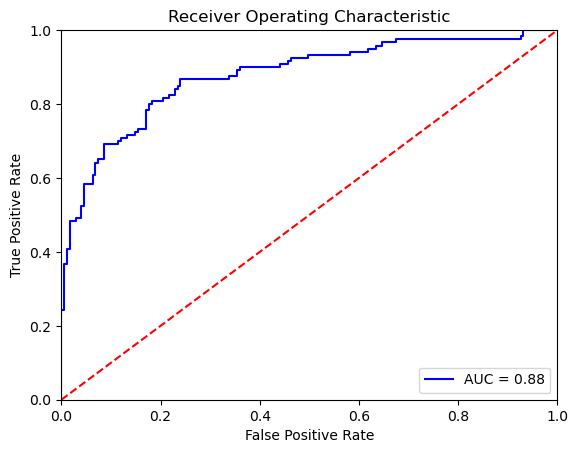

In [66]:
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.8367538661656309


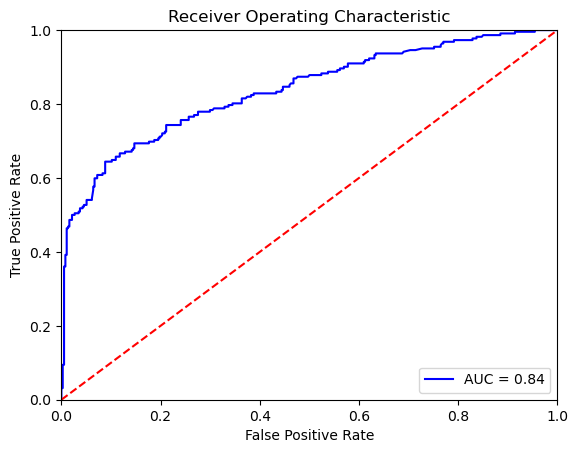

In [67]:
# devuelve la evolucion de:
# false-positive-rate de forma creciente (1-sensitivity)
# True-positive-rate de forma creciente (Sensitivity)
# threshold de forma decreciente
probs_train=clf.predict_proba(X_train) # calculamos las probabilidades (predicción)
fpr, tpr, threshold = metrics.roc_curve(y_train, probs_train[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
Y_pred=probs[:,1]>0.6
accuracy_score(y_test, Y_pred.astype("int"))

0.8101694915254237

In [74]:
# Printing classification report of classifier on the test set set data
print(f"Model Classification Report : \n{classification_report(y_test, Y_pred)}")

Model Classification Report : 
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       175
         1.0       0.86      0.64      0.73       120

    accuracy                           0.81       295
   macro avg       0.82      0.78      0.79       295
weighted avg       0.82      0.81      0.80       295



In [75]:
2*0.73*0.97/(0.73+0.97)

0.8330588235294117

### fila 0:
- Precision: 0.82 (TP/Predicted P) (tomamos el 0 como positivo de la clase)
- Recall: 0.90 (TP/Total de P) (tomamos el 0 como positivo de la clase)

### fila 1:
- Precision: 0.83 (TP/Predicted P) (tomamos el 1 como positivo de la clase)
- Recall: 0.71 (TP/Total de P) (tomamos el 1 como positivo de la clase)

### Si tubieramos más clases (clase i, fila i):
- Precision: 0.XX (TP/Predicted P) (tomamos el i como positivo de la clase)
- Recall: 0.XX (TP/Total de P) (tomamos el i como positivo de la clase)